In [1]:
import pandas as pd
import requests
import json
import os
import re #regex
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.dates import DateFormatter

## Gathering Data
#### 1. read data from `twitter-archive-enhanced.csv` file

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv', index_col=['tweet_id'])

#### 2. download `image_predictions.tsv` file from Udacity's servers using Reques library

In [3]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:85.0) Gecko/20100101 Firefox/85.0'}
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
res = requests.get(url=url, headers=headers)

# if the file image-predictions.tsv is exists don't rewrite it
if not os.path.isfile('image-predictions.tsv'):
    with open('image-predictions.tsv', 'wb') as f:
      f.write(res.content)

In [4]:
images_df = pd.read_csv('image-predictions.tsv', sep='\t', index_col='tweet_id')

> #### tweepy library

In [5]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

#### 3. read `tweet-json.txt` file

In [6]:
# the data in this file is a json objects so I using json library to manipulate it
tweet_list = []
with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet_id = json.loads(line)["id"]
        retweet_count = json.loads(line)["retweet_count"]
        favorite_count = json.loads(line)["favorite_count"]
        dict_object = {"tweet_id": tweet_id, "retweet_count": retweet_count, "favorite_count": favorite_count}
        tweet_list.append(dict_object)

In [7]:
retweet_df = pd.DataFrame(tweet_list)
retweet_df.set_index('tweet_id', inplace=True)

In [8]:
# copy data frames
archive_clean_df = archive_df.copy()
images_clean_df = images_df.copy()
retweet_clean_df = retweet_df.copy()

## Assessing Data
> Visually  
by using a spreadsheet and text editor to examine some random data

> Programmatically  
as follow


### 1. archive_df

In [9]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   in_reply_to_status_id       78 non-null     float64
 1   in_reply_to_user_id         78 non-null     float64
 2   timestamp                   2356 non-null   object 
 3   source                      2356 non-null   object 
 4   text                        2356 non-null   object 
 5   retweeted_status_id         181 non-null    float64
 6   retweeted_status_user_id    181 non-null    float64
 7   retweeted_status_timestamp  181 non-null    object 
 8   expanded_urls               2297 non-null   object 
 9   rating_numerator            2356 non-null   int64  
 10  rating_denominator          2356 non-null   int64  
 11  name                        2356 non-null   object 
 12  doggo                       2356 non-null   object 
 13  fl

In [10]:
archive_df.sample(10)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
674394782723014656,NaN,NaN,2015-12-09 01:07:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He's a hide and seek champion. S...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674394782...,8,10,Gary,None,None,None,None
676936541936185344,NaN,NaN,2015-12-16 01:27:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see a rare pouched pupper. Ample stora...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676936541...,8,10,None,None,None,pupper,None
670468609693655041,NaN,NaN,2015-11-28 05:05:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Edd. He's a Czechoslovakian Googolplex...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670468609...,10,10,Edd,None,None,None,None
689905486972461056,NaN,NaN,2016-01-20 20:21:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Gizmo. He's quite the pupper. Con...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689905486...,11,10,Gizmo,None,None,pupper,None
847971574464610304,NaN,NaN,2017-04-01 00:39:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @basic_vacek_: I love my new mug easy 13/10...,8.479710e+17,597064155.0,2017-04-01 00:36:55 +0000,https://twitter.com/basic_vacek_/status/847971...,13,10,None,None,None,None,None
691820333922455552,NaN,NaN,2016-01-26 03:09:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brockly. He's an uber driver. Falls as...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691820333...,8,10,Brockly,None,None,None,None
734912297295085568,NaN,NaN,2016-05-24 01:02:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jax. He's a literal fluffball. Sneaky ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/734912297...,10,10,Jax,None,None,None,None
692905862751522816,NaN,NaN,2016-01-29 03:03:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wally. He's being abducted by aliens. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692905862...,10,10,Wally,None,None,pupper,None
702217446468493312,NaN,NaN,2016-02-23 19:44:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I know it's tempting, but please stop sending ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/702217446...,9,10,None,None,None,None,None


In [11]:
archive_df[archive_df.name.duplicated()].name

tweet_id
890729181411237888      None
889665388333682689      None
887473957103951883    Canela
887343217045368832      None
887101392804085760      None
                       ...  
666049248165822465      None
666044226329800704         a
666033412701032449         a
666029285002620928         a
666020888022790149      None
Name: name, Length: 1399, dtype: object

In [12]:
archive_df[archive_df.rating_numerator > 10]

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666826780179869698,NaN,NaN,2015-11-18 03:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 simply brilliant pup https://t.co/V6ZzG4...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666826780...,12,10,None,None,None,None,None
666421158376562688,NaN,NaN,2015-11-17 01:02:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*internally screaming* 12/10 https://t.co/YMcr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666421158...,12,10,None,None,None,None,None
666373753744588802,NaN,NaN,2015-11-16 21:54:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Those are sunglasses and a jean jacket. 11/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666373753...,11,10,None,None,None,None,None


In [13]:
archive_df[archive_df.rating_numerator < 10]

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [14]:
archive_df.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [15]:
archive_df[archive_df.rating_numerator == 1776]

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [16]:
(archive_df[archive_df.doggo == 'doggo'].doggo.count(), archive_df[archive_df.floofer == 'floofer'].floofer.count(),
 archive_df[archive_df.pupper == 'pupper'].pupper.count(), archive_df[archive_df.puppo == 'puppo'].puppo.count())

(97, 10, 257, 30)

### Quality
#### archive_df
1. `timestamp` and `retweeted_status_timestamp` data type is object
2. some tweets don't have image
3. some tweets are not originals `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp`
4. `doggo, floofer, pupper, puppo` null data is None not Nan
5. column `name` some time have incorrect name as "a, an, or number"
6. some columns at this point would have no use in analysis `in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp`
7. The `rating_numerator` column should of type float and also it should be correctly extracted from `text` column

### 2. images_df

In [17]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   jpg_url  2075 non-null   object 
 1   img_num  2075 non-null   int64  
 2   p1       2075 non-null   object 
 3   p1_conf  2075 non-null   float64
 4   p1_dog   2075 non-null   bool   
 5   p2       2075 non-null   object 
 6   p2_conf  2075 non-null   float64
 7   p2_dog   2075 non-null   bool   
 8   p3       2075 non-null   object 
 9   p3_conf  2075 non-null   float64
 10  p3_dog   2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 152.0+ KB


In [18]:
images_df.head(15)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True


In [19]:
images_df.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
military_uniform        1
pencil_box              1
African_grey            1
nail                    1
Japanese_spaniel        1
Name: p1, Length: 378, dtype: int64

In [20]:
len(images_df.p1.unique())

378

In [21]:
images_df.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
cockroach               1
pier                    1
folding_chair           1
birdhouse               1
confectionery           1
Name: p2, Length: 405, dtype: int64

In [22]:
len(images_df.p2.unique())

405

In [23]:
images_df.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
pickup                 1
hatchet                1
can_opener             1
coral_reef             1
gorilla                1
Name: p3, Length: 408, dtype: int64

In [24]:
len(images_df.p3.unique())

408

### Quality
#### images_df
1. columns name not descriptive `p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog`
2. some images do not belong to original tweets

### 3. retweet_df

In [25]:
retweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 892420643555336193 to 666020888022790149
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   retweet_count   2354 non-null   int64
 1   favorite_count  2354 non-null   int64
dtypes: int64(2)
memory usage: 55.2 KB


In [26]:
retweet_df.head()

,retweet_count,favorite_count
tweet_id,,
892420643555336193,8853,39467
892177421306343426,6514,33819
891815181378084864,4328,25461
891689557279858688,8964,42908
891327558926688256,9774,41048


### Quality
#### retweet_df

### Tidiness
1. merge the 3 datasets to `archive_df` DataFrame
2. one variable in four columns `doggo, floofer, pupper, puppo`
3. columns doggo, floofer, pupper, puppo have no use

## Cleaning Data

### Define `archive_clean_df`
1. change timestamp and retweeted_status_timestamp data type from object to datetime

### Code

In [27]:
archive_clean_df.timestamp = pd.to_datetime(archive_clean_df.timestamp)
archive_clean_df.retweeted_status_timestamp = pd.to_datetime(archive_clean_df.retweeted_status_timestamp)

### Test

In [28]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   in_reply_to_status_id       78 non-null     float64            
 1   in_reply_to_user_id         78 non-null     float64            
 2   timestamp                   2356 non-null   datetime64[ns, UTC]
 3   source                      2356 non-null   object             
 4   text                        2356 non-null   object             
 5   retweeted_status_id         181 non-null    float64            
 6   retweeted_status_user_id    181 non-null    float64            
 7   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 8   expanded_urls               2297 non-null   object             
 9   rating_numerator            2356 non-null   int64              
 10  rating_denominator          2

### Define
2. select rows that have images from archive_clean_df

### Code

In [29]:
jpg_image_url = sum(images_clean_df.jpg_url.isnull())
jpg_image_url

0

In [30]:
image_index = images_clean_df.index
archive_clean_df = archive_clean_df[archive_clean_df.index.isin(image_index)]

### Test

In [31]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   in_reply_to_status_id       23 non-null     float64            
 1   in_reply_to_user_id         23 non-null     float64            
 2   timestamp                   2075 non-null   datetime64[ns, UTC]
 3   source                      2075 non-null   object             
 4   text                        2075 non-null   object             
 5   retweeted_status_id         81 non-null     float64            
 6   retweeted_status_user_id    81 non-null     float64            
 7   retweeted_status_timestamp  81 non-null     datetime64[ns, UTC]
 8   expanded_urls               2075 non-null   object             
 9   rating_numerator            2075 non-null   int64              
 10  rating_denominator          2

### Define
3. delete null rows from `in_reply_to_status_id, retweeted_status_id` columns

### Code

In [32]:
archive_clean_df = archive_clean_df[(archive_clean_df.in_reply_to_status_id.isnull()) & (archive_clean_df.retweeted_status_id.isnull())]
# other solution
# archive_clean_df.query('in_reply_to_status_id.isnull() & retweeted_status_id.isnull()').info()

### Test

In [33]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   in_reply_to_status_id       0 non-null      float64            
 1   in_reply_to_user_id         0 non-null      float64            
 2   timestamp                   1971 non-null   datetime64[ns, UTC]
 3   source                      1971 non-null   object             
 4   text                        1971 non-null   object             
 5   retweeted_status_id         0 non-null      float64            
 6   retweeted_status_user_id    0 non-null      float64            
 7   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 8   expanded_urls               1971 non-null   object             
 9   rating_numerator            1971 non-null   int64              
 10  rating_denominator          1

In [34]:
# delete images that belong to replies or retweets
archive_clean_df = archive_clean_df[archive_clean_df.index.isin(images_clean_df.index)]
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   in_reply_to_status_id       0 non-null      float64            
 1   in_reply_to_user_id         0 non-null      float64            
 2   timestamp                   1971 non-null   datetime64[ns, UTC]
 3   source                      1971 non-null   object             
 4   text                        1971 non-null   object             
 5   retweeted_status_id         0 non-null      float64            
 6   retweeted_status_user_id    0 non-null      float64            
 7   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 8   expanded_urls               1971 non-null   object             
 9   rating_numerator            1971 non-null   int64              
 10  rating_denominator          1

### Define
4. set None value in `doggo, floofer, pupper, puppo` columns to null

### Code

In [35]:
archive_clean_df.doggo.replace('None', '', inplace=True)
archive_clean_df.floofer.replace('None', '', inplace=True)
archive_clean_df.pupper.replace('None', '', inplace=True)
archive_clean_df.puppo.replace('None', '', inplace=True)

In [36]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   in_reply_to_status_id       0 non-null      float64            
 1   in_reply_to_user_id         0 non-null      float64            
 2   timestamp                   1971 non-null   datetime64[ns, UTC]
 3   source                      1971 non-null   object             
 4   text                        1971 non-null   object             
 5   retweeted_status_id         0 non-null      float64            
 6   retweeted_status_user_id    0 non-null      float64            
 7   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 8   expanded_urls               1971 non-null   object             
 9   rating_numerator            1971 non-null   int64              
 10  rating_denominator          1

### Define
5. drop columns that will have no use for analysis process  
`'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'`

### Code

In [37]:
archive_clean_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

### Test

In [38]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 892420643555336193 to 666020888022790149
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           1971 non-null   datetime64[ns, UTC]
 1   source              1971 non-null   object             
 2   text                1971 non-null   object             
 3   expanded_urls       1971 non-null   object             
 4   rating_numerator    1971 non-null   int64              
 5   rating_denominator  1971 non-null   int64              
 6   name                1971 non-null   object             
 7   doggo               1971 non-null   object             
 8   floofer             1971 non-null   object             
 9   pupper              1971 non-null   object             
 10  puppo               1971 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 184

### Define
6. clear incorrect column `name` values which have incorrect name like "a, an, or number, ..."

### code

In [39]:
archive_clean_df.name.value_counts().sort_values()

incredibly      1
Poppy           1
Strider         1
Asher           1
Roscoe          1
             ... 
Cooper         10
Oliver         10
Charlie        11
a              55
None          524
Name: name, Length: 935, dtype: int64

In [40]:
# replace None string with null
archive_clean_df.name.replace('None', np.nan, inplace=True)
archive_clean_df.name.value_counts(dropna = False).sort_index()

Abby              2
Ace               1
Acro              1
Adele             1
Aiden             1
               ... 
the               7
this              1
unacceptable      1
very              4
NaN             524
Name: name, Length: 935, dtype: int64

In [41]:
# archive_clean_df_1 = archive_clean_df.copy()
pattern = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?(?:of\s)?([A-Z]+[A-Za-z]+)')
for index, row in archive_clean_df.iterrows(): 
    if pd.isnull(row['name']) or row['name'][0].islower() or row['name'] == 'None':
        try:
            c_name = re.findall(pattern, row['text'])[0]
            if pd.isnull(row['name']):
                archive_clean_df.loc[index,'name'] = c_name
            else:
                archive_clean_df.loc[index,'name'] = archive_clean_df.loc[index,'name'].replace(row['name'], c_name)

        except IndexError:
            archive_clean_df.loc[index,'name'] = np.nan

### Test

In [42]:
archive_clean_df.name.value_counts(dropna = False).sort_index()

Abby       2
Ace        1
Acro       1
Adele      1
Aiden      1
        ... 
Zoe        1
Zoey       5
Zooey      1
Zuzu       1
NaN      592
Name: name, Length: 937, dtype: int64

### Define
7. The `rating_numerator` column should of type float and also it should be correctly extracted from `text` column

### Code

In [43]:
pattern = re.compile(r'(\d+\.?\d*\/\d+)')
for index, row in archive_clean_df.iterrows(): 
    c_numerator = re.findall(pattern, row['text'])[0]
#     print(c_numerator)
#     print(c_numerator.split('/')[0])
    archive_clean_df.loc[index,'rating_numerator'] = c_numerator.split('/')[0]
    
archive_clean_df.rating_numerator = archive_clean_df.rating_numerator.astype(float)

### Test

In [44]:
archive_clean_df.rating_numerator.value_counts()

12.00      446
10.00      417
11.00      392
13.00      253
9.00       150
8.00        95
7.00        52
14.00       33
6.00        32
5.00        32
3.00        19
4.00        16
2.00         9
1.00         5
60.00        1
88.00        1
80.00        1
24.00        1
165.00       1
144.00       1
420.00       1
11.27        1
13.50        1
121.00       1
11.26        1
1776.00      1
50.00        1
204.00       1
45.00        1
44.00        1
9.75         1
84.00        1
99.00        1
0.00         1
Name: rating_numerator, dtype: int64

### Define `images_clean_df`
1. rename columns `p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog` name to descriptive names

### Code

In [45]:
images_clean_df = images_clean_df.rename(columns={
    'p1': 'first_prediction', 'p1_conf': 'first_prediction_confident', 'p1_dog': 'first_prediction_is_breed_dog',
'p2': 'second_prediction', 'p2_conf': 'second_prediction_confident', 'p2_dog': 'second_prediction_is_breed_dog',
'p3': 'third_prediction', 'p3_conf': 'third_prediction_confident', 'p3_dog': 'third_prediction_is_breed_dog'})

### Test

In [46]:
images_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   jpg_url                         2075 non-null   object 
 1   img_num                         2075 non-null   int64  
 2   first_prediction                2075 non-null   object 
 3   first_prediction_confident      2075 non-null   float64
 4   first_prediction_is_breed_dog   2075 non-null   bool   
 5   second_prediction               2075 non-null   object 
 6   second_prediction_confident     2075 non-null   float64
 7   second_prediction_is_breed_dog  2075 non-null   bool   
 8   third_prediction                2075 non-null   object 
 9   third_prediction_confident      2075 non-null   float64
 10  third_prediction_is_breed_dog   2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 152.0+

### Define
2. drop images that do not belong to original tweets

### Code

In [47]:
images_clean_df = images_clean_df[images_clean_df.index.isin(archive_clean_df.index)]

### Test

In [48]:
images_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 666020888022790149 to 892420643555336193
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   jpg_url                         1971 non-null   object 
 1   img_num                         1971 non-null   int64  
 2   first_prediction                1971 non-null   object 
 3   first_prediction_confident      1971 non-null   float64
 4   first_prediction_is_breed_dog   1971 non-null   bool   
 5   second_prediction               1971 non-null   object 
 6   second_prediction_confident     1971 non-null   float64
 7   second_prediction_is_breed_dog  1971 non-null   bool   
 8   third_prediction                1971 non-null   object 
 9   third_prediction_confident      1971 non-null   float64
 10  third_prediction_is_breed_dog   1971 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 144.4+

## Tidiness
merge the 3 datasets to `archive_df` DataFrame
### Define
1. merge the 3 datasets to `archive_df` DataFrame

### Code

In [49]:
archive_clean_df = pd.merge(archive_clean_df, retweet_clean_df, how='left', left_index=True, right_index=True)

In [50]:
archive_clean_df.head()

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
tweet_id,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,,,,,8853,39467
892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,,,,,6514,33819
891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,,,,,4328,25461
891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,,,,,8964,42908
891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,,,,,9774,41048


### Test

In [51]:
archive_clean_df[archive_clean_df.index == 891327558926688256].retweet_count

tweet_id
891327558926688256    9774
Name: retweet_count, dtype: int64

In [52]:
retweet_clean_df[retweet_clean_df.index == 891327558926688256].retweet_count

tweet_id
891327558926688256    9774
Name: retweet_count, dtype: int64

In [53]:
archive_clean_df[archive_clean_df.index == 891327558926688256].retweet_count == retweet_clean_df[retweet_clean_df.index == 891327558926688256].retweet_count

tweet_id
891327558926688256    True
Name: retweet_count, dtype: bool

In [54]:
archive_clean_df = pd.merge(archive_clean_df, images_clean_df, how='left', left_index=True, right_index=True)

In [55]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 892420643555336193 to 666020888022790149
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   timestamp                       1971 non-null   datetime64[ns, UTC]
 1   source                          1971 non-null   object             
 2   text                            1971 non-null   object             
 3   expanded_urls                   1971 non-null   object             
 4   rating_numerator                1971 non-null   float64            
 5   rating_denominator              1971 non-null   int64              
 6   name                            1379 non-null   object             
 7   doggo                           1971 non-null   object             
 8   floofer                         1971 non-null   object             
 9   pupper                          1971 non-null   object

## Tidiness
one variable in four columns `doggo, floofer, pupper, puppo`
### Define
2. add new column called `classification` to hold value of `doggo, floofer, pupper, puppo` column

### Code

In [56]:
for index, row in archive_clean_df.iterrows():
    classification_value = row.doggo
    if row.floofer:
        if classification_value:
            classification_value = str(classification_value) + ", " +  str(row.floofer)
        else:
            classification_value = row.floofer
    
    if row.pupper:
        if classification_value:
            classification_value = str(classification_value) + ', ' +  str(row.pupper)
        else:
            classification_value = row.pupper
    
    if row.puppo:
        if classification_value:
            classification_value = str(classification_value) + ', ' +  str(row.puppo)
        else:
            classification_value = row.puppo
    
#     archive_clean_df['classification'][index] = classification_value
    archive_clean_df.loc[index, 'classification'] = classification_value

### Test

In [57]:
archive_clean_df.classification.value_counts()

                  1668
pupper             201
doggo               63
puppo               22
doggo, pupper        8
floofer              7
doggo, floofer       1
doggo, puppo         1
Name: classification, dtype: int64

## Tidiness
columns `doggo, floofer, pupper, puppo` have no use
### Define
3. drop columns `doggo, floofer, pupper, puppo`

### Code

In [58]:
archive_clean_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

### Test

In [59]:
archive_clean_df.head(20)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,...,first_prediction,first_prediction_confident,first_prediction_is_breed_dog,second_prediction,second_prediction_confident,second_prediction_is_breed_dog,third_prediction,third_prediction_confident,third_prediction_is_breed_dog,classification
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,
892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,
891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,
891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,
891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,
891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,NaN,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,
890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,2158,12041,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,
890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,NaN,16716,56848,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,
890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,4429,28226,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,


### Storing data

In [60]:
archive_clean_df.to_csv('twitter_archive_master.csv', encoding='utf-8')
# images_clean_df.to_csv('twitter_image_master.csv', encoding='utf-8')

## Analysis & Visulaization
### Insights
#### Top 10 retweet count

In [61]:
retweet_count_avg_time = archive_clean_df.groupby([(archive_clean_df.timestamp.dt.year), (archive_clean_df.timestamp.dt.month)]).retweet_count.mean().sort_values(ascending=False)[10::-1]
retweet_count_avg_time

timestamp  timestamp
2016       10           4274.276923
2017       2            4438.031250
           3            4886.212766
2016       11           4922.961538
           12           5400.351852
2017       4            5844.275000
           1            6443.575758
           6            6586.090909
           7            6868.530612
           5            7570.023810
           8            7683.500000
Name: retweet_count, dtype: float64

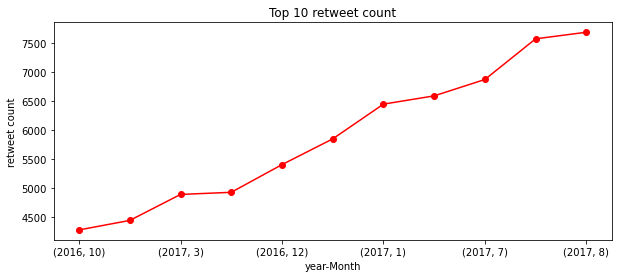

In [62]:
retweet_count_avg_time.plot(kind='line', style='-ro', figsize=(10,4))
plt.xlabel('year-Month')
plt.ylabel('retweet count')
plt.title('Top 10 retweet count')
plt.savefig('Top 10 retweet count.png')

#### First breed iamge is a dog vs not a dog

In [63]:
first_breed_is_dog = images_clean_df[images_clean_df.first_prediction_is_breed_dog == True].first_prediction_is_breed_dog.count()
first_breed_is_not_dog = images_clean_df[images_clean_df.first_prediction_is_breed_dog == False].first_prediction_is_breed_dog.count()
(first_breed_is_dog, first_breed_is_not_dog)

(1463, 508)

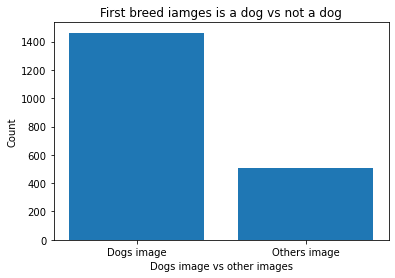

In [64]:
locations = [1, 2]
heights = [first_breed_is_dog, first_breed_is_not_dog]
labels = ['Dogs image', 'Others image']
plt.bar(locations, heights, tick_label=labels)
plt.title('First breed iamges is a dog vs not a dog')
plt.xlabel('Dogs image vs other images')
plt.ylabel('Count');
plt.savefig('First breed iamges is a dog vs not a dog.png')

#### Top 10 most populare dog name

In [65]:
most_popular_name = archive_clean_df.name.value_counts().sort_values(ascending=False)[10::-1]

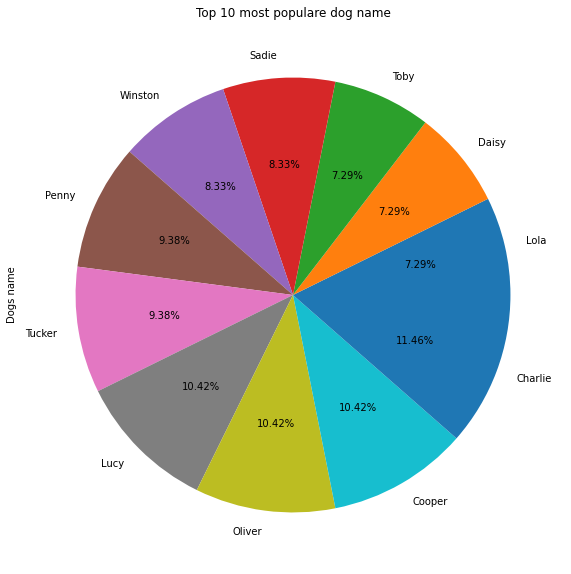

In [66]:
# plt.pie(most_popular_name,radius=3, autopct='%1.2f%%')
most_popular_name.plot(kind='pie', autopct='%1.2f%%', figsize=(10,10))
plt.title('Top 10 most populare dog name')
plt.ylabel('Dogs name');
plt.savefig('Top 10 most populare dog name.png')

### Visualization

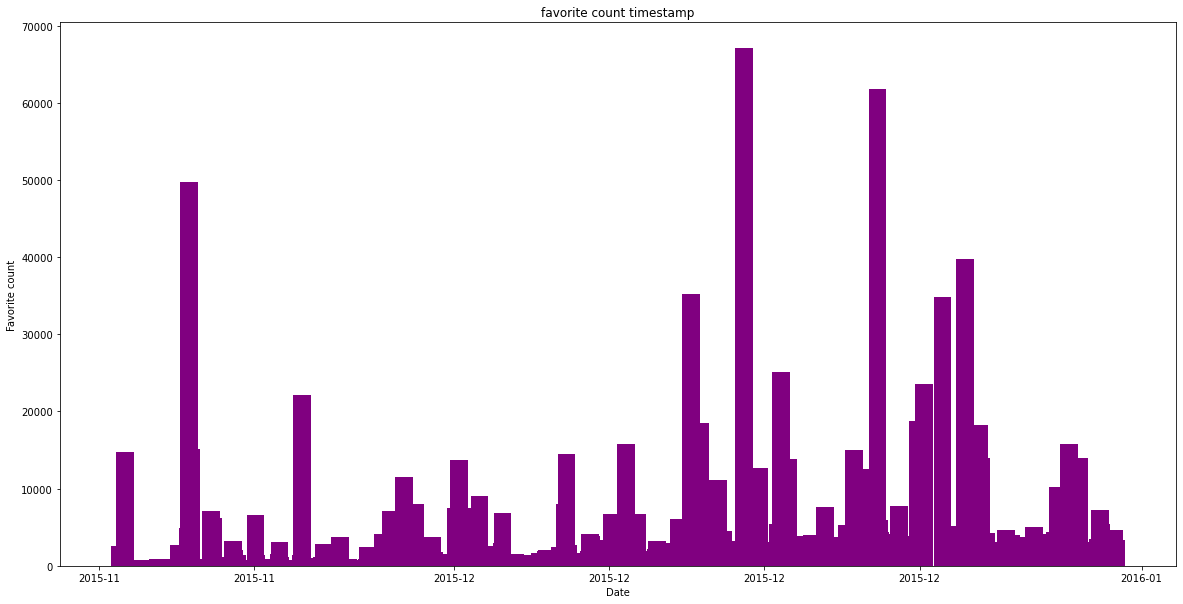

In [67]:
archive_2015 = archive_clean_df[(archive_clean_df.timestamp >= '2015-01-01') & (archive_clean_df.timestamp <= '2015-12-31')]

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(archive_2015.timestamp, archive_2015.favorite_count, color='purple')
ax.set(xlabel="Date",
       ylabel="Favorite count",
       title="favorite count timestamp")

# Define the date format
date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)

# plt.show()
plt.savefig('favorite_count_timestamp.png')